# Applied Machine Learning Midterm Project: _Classification Analysis_

## Jason Ballard

#### Basehor, Kansas (CDT)

#### April 6, 2025

> Submission: GitHub Repository with Jupyter Notebook and Peer Review
---

## 📌 Project Overview

Organizations frequently need to classify data to support decision-making. 
For example, a healthcare provider may want to predict whether a patient has a specific condition based on lab results,
or a business may classify customer behavior to tailor marketing strategies.
Machine learning classification models help automate these decisions by recognizing patterns in historical data.

This project demonstrates the ability to apply classification modeling techniques to a real-world dataset. You will:

- Load and explore a dataset.
- Analyze feature distributions and consider feature selection.
- Train and evaluate a classification model.
- Compare different classification approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate’s project.
---

## Dependencies
---

In [1]:
# Standard Library
import logging
import os

# Data Handling
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Utility
import tabulate

# Scikit-learn: Model Selection
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Scikit-learn: Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Scikit-learn: Preprocessing & Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


# Scikit-learn: Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

## Section 1. Import and Inspect the Data
---

### - 1.1 Load the dataset and display the first 10 rows.
---

In [2]:
# Load the Mushroom Classification dataset
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

df = pd.read_csv(data_url, header=None, names=column_names)

# Display shap of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display first few rows
print(df.head(10))


Shape of the dataset: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k 

### - 1.2 Check for missing values and display summary statistics.
---

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(" Missing Values:\n", missing_values[missing_values > 0])
# Check for duplicates
duplicates = df.duplicated().sum()  
#
df.replace('?', np.nan, inplace=True)

# Basic summary statistics (only works meaningfully after encoding)
print("\n Summary Statistics (non-numeric preview):")
print(df.describe(include='all').T)

# Check for class balance
print("\n Class Distribution:")
print(df['class'].value_counts())

# Visualize missing data if any
if missing_values.any():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
    plt.title("Missing Data Heatmap")
    plt.show()

 Missing Values:
 Series([], dtype: int64)

 Summary Statistics (non-numeric preview):
                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                5644      4   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
r

## Section 2. Data Exploration and Preparation
---

### - 2.1 Explore data patterns and distributions
  - Create histograms, boxplots, and count plots for categorical variables (as applicable).
  - Identify patterns, outliers, and anomalies in feature distributions.
  - Check for class imbalance in the target variable (as applicable).
  ---

In [4]:
# Create images folder if it doesn't exist
os.makedirs("images", exist_ok=True)

# Class imbalance check
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, hue='class', palette='Set2', legend=False)
plt.title("Class Distribution: Edible vs Poisonous")
plt.xlabel("Class (e = Edible, p = Poisonous)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('images/class_distribution.png', dpi=300)
plt.close()

# Explore distributions of selected categorical features
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'habitat']

# Count plots for each selected feature
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        x=feature,
        data=df,
        hue=feature,
        palette='viridis',
        order=df[feature].value_counts().index,
        legend=False
    )
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'images/{feature}_distribution.png', dpi=300)
    plt.close()

# Check for rare categories or anomalies
print("\n Unique values per feature:")
for col in df.columns:
    print(f"{col:25} : {df[col].nunique()} unique values")

print("\n Checking for rare categories (less than 10 occurrences):")
for col in df.columns:
    counts = df[col].value_counts()
    rare = counts[counts < 10]
    if not rare.empty:
        print(f"{col}: {rare.to_dict()}")



 Unique values per feature:
class                     : 2 unique values
cap-shape                 : 6 unique values
cap-surface               : 4 unique values
cap-color                 : 10 unique values
bruises                   : 2 unique values
odor                      : 9 unique values
gill-attachment           : 2 unique values
gill-spacing              : 2 unique values
gill-size                 : 2 unique values
gill-color                : 12 unique values
stalk-shape               : 2 unique values
stalk-root                : 4 unique values
stalk-surface-above-ring  : 4 unique values
stalk-surface-below-ring  : 4 unique values
stalk-color-above-ring    : 9 unique values
stalk-color-below-ring    : 9 unique values
veil-type                 : 1 unique values
veil-color                : 4 unique values
ring-number               : 3 unique values
ring-type                 : 5 unique values
spore-print-color         : 9 unique values
population                : 6 unique values
h

### - 2.2 Handle missing values and clean data
  - Impute or drop missing values (as applicable).
  - Remove or transform outliers (as applicable).
  - Convert categorical data to numerical format using encoding (as applicable).
  ---

In [5]:
# Re-check missing values before handling
print(" Missing Values Before Cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Impute with most frequent value
most_freq = df['stalk-root'].mode()[0]
df ['stalk-root'] = df['stalk-root'].replace(np.nan, most_freq)

# After imputation, rename to df_clean
df_clean = df.copy()

# Confirm cleaning
print("\n Missing Values After Cleaning:")
print(df_clean.isnull().sum().sum(), "missing values remaining")

# Encode categorical features using Label Encoding
df_encoded = df_clean.copy()
label_encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save for inverse_transform or decoding later

# Confirm encoding
print("\n Encoded Data Sample:")
print(df_encoded.head())

# Visualize the cleaned and encoded data using scatter matrix
scatter_matrix(df_encoded, alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of Encoded Data")
plt.tight_layout()
plt.savefig('images/scatter_matrix_cleaned.png', dpi=300)
plt.close()

 Missing Values Before Cleaning:
stalk-root    2480
dtype: int64

 Missing Values After Cleaning:
0 missing values remaining

 Encoded Data Sample:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4           

c:\Users\balla\Projects\ml-04-midterm-jballard\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\balla\Projects\ml-04-midterm-jballard\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\balla\Projects\ml-04-midterm-jballard\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


### - 2.3 Feature selection and engineering
  - Create new features (as applicable).
  - Transform or combine existing features to improve model performance (as applicable).
  - Scale or normalize data (as applicable).
  ---

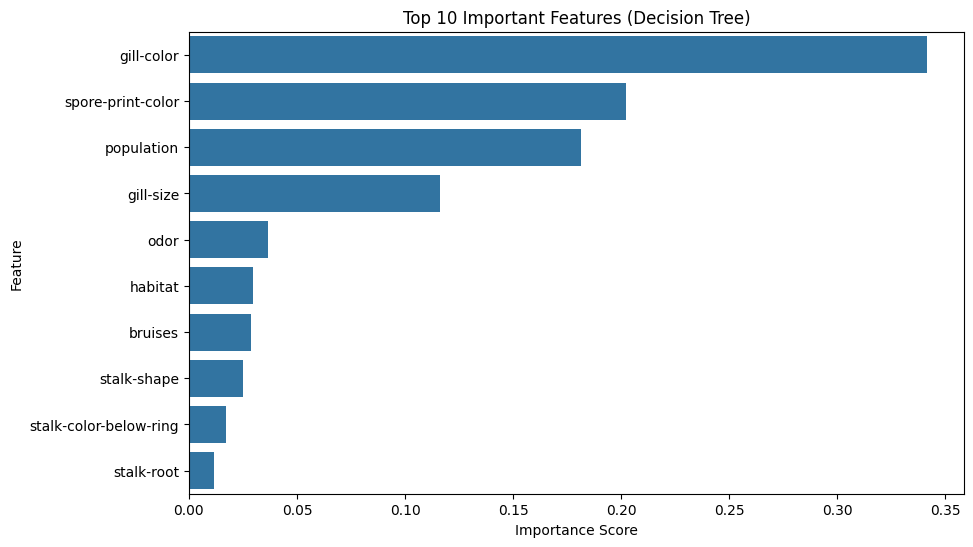


 Scaled Feature Sample:
   cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0   1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1   1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2  -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3   1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4   1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0     -0.438864   1.494683   -0.228998    -1.144806  ...   
1     -0.438864  -0.669038   -0.228998    -1.144806  ...   
2     -0.438864  -0.669038    0.053477    -1.144806  ...   
3     -0.438864   1.494683    0.053477    -1.144806  ...   
4      2.278612  -0.669038   -0.228998     0.873511  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                  0.586385                0.622441                0.631

In [6]:
# Separate features and target
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

# Optional: Create interaction features (if any domain knowledge suggests it)
# Example (not meaningful here without context):
# X['odor_gill'] = X['odor'] * X['gill-color']  # Not used here, but shown for structure

# Explore feature importance using a simple Decision Tree
# This is a quick way to see which features are most important
# and can help in feature selection
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Get feature importances
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Scaling – Required only for distance-based models (e.g., SVM, MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wrap into DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Confirm scaled data
print("\n Scaled Feature Sample:")
print(X_scaled_df.head())
plt.savefig('images/Top_10_features.png', dpi=300)
plt.close()


## Section 3. Feature Selection and Justification
---

- 3.1 Choose features and target
  - Select two or more input features (numerical for regression, numerical and/or categorical for classification)
  - Select a target variable (as applicable)
    - Regression: Continuous target variable (e.g., price, temperature).
    - Classification: Categorical target variable (e.g., gender, species).
    - Clustering: No target variable.
  - Justify your selection with reasoning.
---


In [7]:
# Define features (X) and target (y)
# Target variable: 'class' – edible (e) or poisonous (p)
# Features selected based on earlier Decision Tree feature importance

selected_features = [
    'odor',            # Most influential — strong indicator of toxicity
    'gill-color',      # Indicates maturity and species — useful class separation
    'spore-print-color', # Important taxonomic trait among mushrooms
    'habitat',         # Environmental context — some mushrooms grow in specific regions
    'population'       # Can hint at species commonality
]

# Feature and target definition
X_selected = df_encoded[selected_features]
y = df_encoded['class']  # 0 = edible, 1 = poisonous (after LabelEncoding)

- 3.2 Define X and y
  - Assign input features to X
  - Assign target variable to y (as applicable)
---

In [8]:
# Input features (selected from 3.1)
X = df_encoded[[
    'odor',
    'gill-color',
    'spore-print-color',
    'habitat',
    'population'
]]

# Target variable: 'class' (edible vs. poisonous)
y = df_encoded['class']

# Confirm shapes and sample
print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print("\n Feature Sample:")
print(X.head())

print("\n Target Sample:")
print(y.head())


 Features shape: (8124, 5)
 Target shape: (8124,)

 Feature Sample:
   odor  gill-color  spore-print-color  habitat  population
0     6           4                  2        5           3
1     0           4                  3        1           2
2     3           5                  3        3           2
3     6           5                  2        5           3
4     5           4                  3        1           0

 Target Sample:
0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64


## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)
---

### - 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
---

In [9]:
# Define Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Confirm distribution in each split
print(" Class distribution in full dataset:")
print(y.value_counts(normalize=True))

print("\n Class distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\n Class distribution in test set:")
print(y_test.value_counts(normalize=True))

# Confirm shapes
print(f"\n Training set: {X_train.shape}, Test set: {X_test.shape}")


 Class distribution in full dataset:
class
0    0.517971
1    0.482029
Name: proportion, dtype: float64

 Class distribution in training set:
class
0    0.517926
1    0.482074
Name: proportion, dtype: float64

 Class distribution in test set:
class
0    0.518154
1    0.481846
Name: proportion, dtype: float64

 Training set: (6499, 5), Test set: (1625, 5)


### - 4.2 Train model using Scikit-Learn model.fit() method.

#### - 4.2 Decison Tree model
---

In [10]:
# 4.2a Decison Tree model
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using training data
dt_model.fit(X_train, y_train)

# Confirm training complete
print(" Decision Tree model trained successfully.")


 Decision Tree model trained successfully.


### - 4.3 Evalulate performance, for example:
  - Regression: R^2, MAE, RMSE (RMSE has been recently updated)
  - Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
  - Clustering: Inertia, Silhouette Score
---

In [11]:
# Section 4.3 – Evaluate Performance (Decision Tree as Primary)
# Predict on test set using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate metrics
print(" Decision Tree – Performance Metrics:")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred_dt):.4f}")

# Confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Optional: Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_dt))


 Decision Tree – Performance Metrics:
Accuracy Score     : 1.0000
Precision Score    : 1.0000
Recall Score       : 1.0000
F1 Score           : 1.0000

 Confusion Matrix:
[[842   0]
 [  0 783]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Section 5. Improve the Model or Try Alternatives (Implement a Second Option)
---

### - 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.
---


In [12]:
# 5.1 Random Forest model
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Confirm training
print(" Random Forest model trained successfully.")


 Random Forest model trained successfully.


In [13]:
# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print(" Random Forest – Performance Metrics:")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred_rf):.4f}")

# Confusion matrix
print("\n Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


 Random Forest – Performance Metrics:
Accuracy Score     : 1.0000
Precision Score    : 1.0000
Recall Score       : 1.0000
F1 Score           : 1.0000

 Confusion Matrix (Random Forest):
[[842   0]
 [  0 783]]


### - 5.2 Compare the performance of all models across the same performance metrics.
---

In [14]:
# Collect metrics for both models in a detailed comparison table
metrics = {
    "Model Type": [],
    "Case": [],
    "Features Used": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Notes": []
}

# Shared info
feature_set = "odor, gill-color, spore-print-color, habitat, population"

# Decision Tree
metrics["Model Type"].append("Decision Tree")
metrics["Case"].append("Case A")
metrics["Features Used"].append(feature_set)
metrics["Accuracy"].append(f"{accuracy_score(y_test, y_pred_dt) * 100:.2f}%")
metrics["Precision"].append(f"{precision_score(y_test, y_pred_dt) * 100:.2f}%")
metrics["Recall"].append(f"{recall_score(y_test, y_pred_dt) * 100:.2f}%")
metrics["F1-Score"].append(f"{f1_score(y_test, y_pred_dt) * 100:.2f}%")
metrics["Notes"].append("Primary model")

# Random Forest
metrics["Model Type"].append("Random Forest")
metrics["Case"].append("Case A")
metrics["Features Used"].append(feature_set)
metrics["Accuracy"].append(f"{accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
metrics["Precision"].append(f"{precision_score(y_test, y_pred_rf) * 100:.2f}%")
metrics["Recall"].append(f"{recall_score(y_test, y_pred_rf) * 100:.2f}%")
metrics["F1-Score"].append(f"{f1_score(y_test, y_pred_rf) * 100:.2f}%")
metrics["Notes"].append("Additional model")

# Display as DataFrame
comparison_df = pd.DataFrame(metrics)

# Print clean markdown-style table (optional)
print("\n Tree and Forest Model Comparison Table:")
print(comparison_df.to_markdown(index=False))


 Tree and Forest Model Comparison Table:
| Model Type    | Case   | Features Used                                            | Accuracy   | Precision   | Recall   | F1-Score   | Notes            |
|:--------------|:-------|:---------------------------------------------------------|:-----------|:------------|:---------|:-----------|:-----------------|
| Decision Tree | Case A | odor, gill-color, spore-print-color, habitat, population | 100.00%    | 100.00%     | 100.00%  | 100.00%    | Primary model    |
| Random Forest | Case A | odor, gill-color, spore-print-color, habitat, population | 100.00%    | 100.00%     | 100.00%  | 100.00%    | Additional model |


## Section 6. Final Thoughts & Insights
---


### - 6.1 Summarize findings.
---
(write here)    

### - 6.2 Discuss challenges faced.
---
(write here)

### - 6.3 If you had more time, what would you try next?
---
(write here)